In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import heapq

In [3]:
# helper function
def print_graph(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G,k=1000, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

 
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

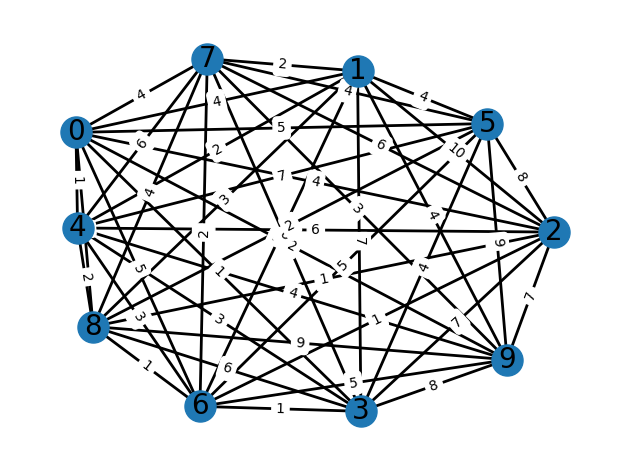

In [4]:
n = 10
G = nx.complete_graph(n)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(1,10)

print_graph(G)

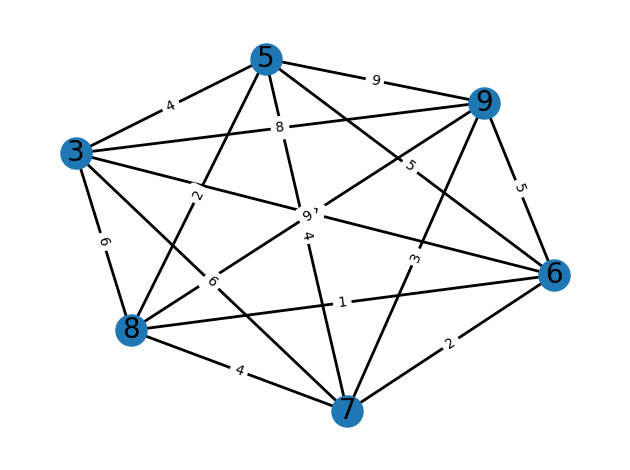

In [5]:


T = nx.minimum_spanning_tree(G)
weight = 0
for _,_,w in T.edges(data=True):
    weight += w['weight']

O = [node for node in T.nodes if T.degree[node] % 2 != 0]
sub_G = G.subgraph(O)
print_graph(sub_G)

{(7, 9), (6, 3), (8, 5)}
[(0, 3), (0, 4), (0, 8), (0, 9), (1, 4), (1, 7), (2, 6), (2, 8), (5, 8)]


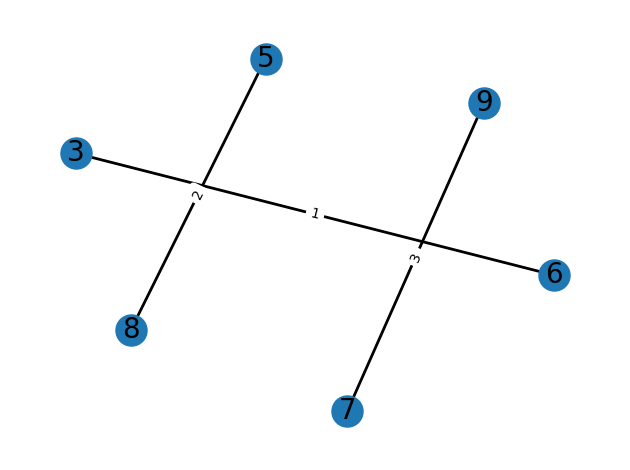

In [6]:
M = nx.algorithms.matching.min_weight_matching(sub_G)
assert(nx.algorithms.is_perfect_matching(sub_G,M))
#H = nx.MultiGraph(G.edges(data=True))
print(M)
print(list(T.edges))
H1 = G.edge_subgraph(list(M))
H2 = G.edge_subgraph(list(T.edges))
print_graph(H1)

[(3, 6), (3, 0), (6, 2), (5, 8), (5, 8), (8, 0), (8, 2), (7, 9), (7, 1), (9, 0), (0, 4), (4, 1)]


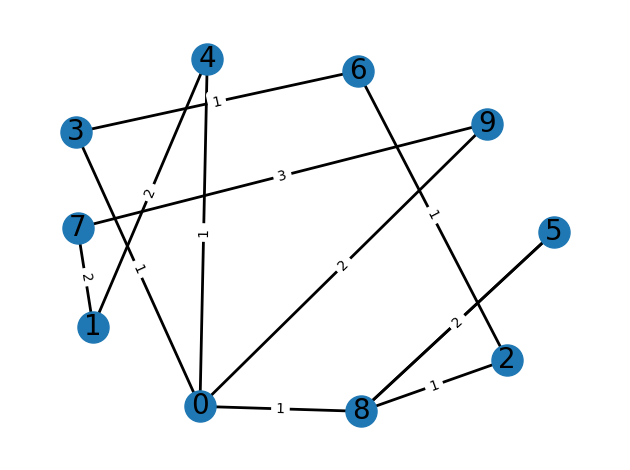

In [7]:
# Create a new MultiGraph and combine
H = nx.MultiGraph()
H.add_edges_from(H1.edges(data=True))
H.add_edges_from(H2.edges(data=True))
print(H.edges())
print_graph(H)

[(3, 0), (3, 6), (0, 4), (0, 9), (0, 8), (4, 1), (1, 7), (7, 9), (8, 5), (8, 5), (8, 2), (2, 6)]


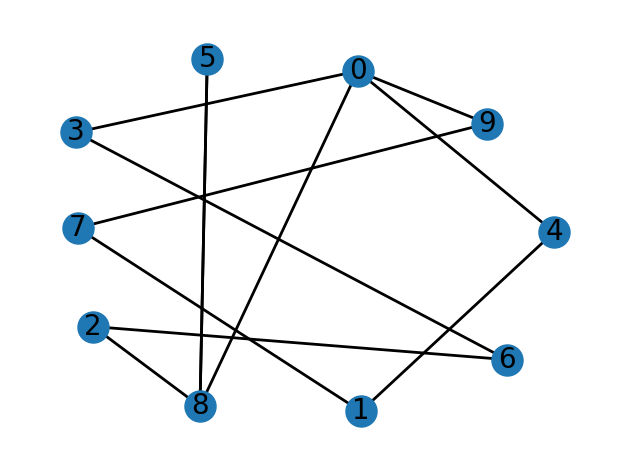

In [8]:
EH = nx.MultiGraph(nx.algorithms.eulerian_circuit(H))
print(EH.edges())
print_graph(EH)

In [9]:
EH.edges()

MultiEdgeDataView([(3, 0), (3, 6), (0, 4), (0, 9), (0, 8), (4, 1), (1, 7), (7, 9), (8, 5), (8, 5), (8, 2), (2, 6)])